<img src="ppgec.png" alt="drawing" width="80" align="right" />

**Universidade Federal do Rio Grande do Sul**

**Programa de Pós-Graduação em Engenharia Civil**


# Vibrações I
### Aula 07: Vibrações por Excitação Harmônica em Sistemas Não-Amortecidos.

*Profa. Dra. Letícia Fleck Fadel Miguel*

*Daniel B. M. Matos*




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plot_config import *
plot_config()

## Vibração forçada harmonicamente

De forma simplificada, os carregamentos harmônicos serão definidos como funções seno e cosseno, como exposto abaixo:

\begin{align}
F = f_0 \sin{\omega t}\\
F = f_0 \cos{\omega t}
\end{align}

Usando a função seno como exemplo, é possível escrever a equação do movimento da seguinte forma:

\begin{align}
m\ddot{u}(t) + c\dot{u}(t) + ku(t) = f_0 \sin{\omega t}
\end{align}








Dessa forma, é possível resolver esta equação diferencial separando-a em duas soluções: solução homogênea e solução particular.

\begin{align}
u(t) = u_{homogênea} + u_{particular}
\end{align}

A solução homogêna consiste na resolucão de um sistema em vibração livre, enquanto a solução particular será feita a partir do teorema da preservação da frequência, onde a frequência da resposta terá mesma frequência de oscilação do carregamento externo.

##  Sistema não amortecido

Num sistema sem amortecimento, a equação de equilíbrio pode ser escrita por:
\begin{align}
m\ddot{u}(t) + ku(t) = f_0 \sin{\omega t}
\end{align}

 Aresposta homogêna pode ser escrita por:
 
 \begin{align}
 u_{homogênea} = A \cos{\omega_n t} + B \sin{\omega_n t}
 \end{align}
 
 Enquanto a solução particular será dada pelo teorema da preservação da frequência:
 
\begin{align}
u_{particular} = C \sin{\omega t}
\end{align}



Substituindo a solução particular na equação de equilíbrio, é possível descobrir a constante C:

\begin{align*}
-m \omega^2C\sin{\omega t} + kC \sin{\omega t} &= f_0 \sin{\omega t} \\
-m \omega^2 C + kC &= f_0 \\
-\frac{\omega^2}{\omega_n^2} C + C &= \frac{f_0}{k} \\
\end{align*}
Apresentando o termo $\beta$ como:

\begin{align}
\beta &= \frac{\omega}{\omega_n} \\
\end{align}









É possível definir a constante C:

\begin{align}
C                  &= \frac{f_0}{k} \left(\frac{1}{1 - \beta^2}\right)
\end{align}

É importante observar que o termo $ \frac{f_0}{k}$ corresponde ao deslocamento estático do sistema.



Agora, é possível escrever a equação geral como:

\begin{align}
u(t) = A \cos{\omega_n t} + B \sin{\omega_n t} + \frac{f_0}{k} \left(\frac{1}{1 - \beta^2}\right) \sin{\omega t}
\end{align}

Onde as constantes A e B podem ser definidas a partir dos valores iniciais do sistema $u(0)$ e $ \dot{u}(0)$. Para um sistema com valores iniciais nulos $ u(0) = \dot{u}(0) = 0$, as constantes serão:
\begin{align*}
A &= 0 \\ 
B &= -\frac{f_0 \beta}{k}\left(\frac{1}{1 - \beta^2}\right)
\end{align*}

Sendo possível, agora, definir a expressão do deslocamento:

\begin{align}
u(t) = \frac{f_0}{k}\left(\frac{1}{1 - \beta^2}\right) (\sin{\omega t} - \beta\sin{\omega_n t})
\end{align}

Com isso, é possível perceber que o deslocamento pode ser escrito em fução do seu deslocamento estático:

\begin{align}
u(t) = u_{est} R(t)
\end{align}

em que $R(t)$ é a função de ganho, que pode ser escrita por:

\begin{align}
R(t) = \left(\frac{1}{1 - \beta^2}\right) (\sin{\omega t} - \beta\sin{\omega_n t})
\end{align}

## Batimento

O fenômeno de batimento ocorre quando quando a frequência de excitação é muito próxima da frequência natural do sistema: $w \approx w_n$. Dessa forma, é possível verificar duas frequências bem definidas na oscilação: a alta = $w + \Delta w/2$ e a baixa $\Delta w/2$.

In [2]:
# Fenômeno do batimento
F0 = 1000                                                      # Amplitude da força
wn = 3                                                         # Frequência natural
w  = 2.9                                                       # Frequência da oscilação
beta = w/wn
m  = 200                                                       # Massa do sistema
k  = wn**2 * m                                                 # Rigidez
ust = F0/k                                                     # Deslocamento estático
t = np.linspace(0,250,1000)
R = (1/(1-beta**2))*(np.sin(w*t) - beta*np.sin(wn*t))          # Função de ganho
u = ust*R                                                      # Deslocamento

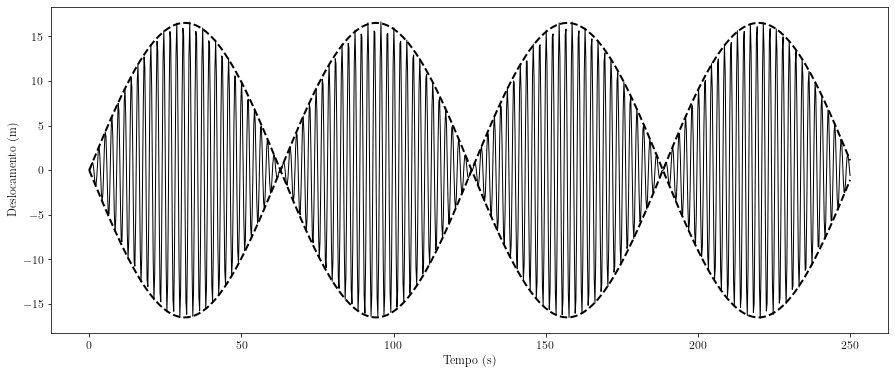

In [3]:
plt.figure(1,figsize = (15,6))
plt.xlabel('Tempo (s)') ; plt.ylabel('Deslocamento (m)')
plt.plot(t,u,'k')
plt.plot(t,16.5*np.sin(0.05*t),'k--',linewidth = 2)
plt.plot(t,-16.5*np.sin(0.05*t),'k--',linewidth = 2)
plt.grid(False)


##   Ressonância

O fenômeno de ressonância ocorre quando o sistema recebe o máximo de energia proviniente da excitação externa. O máximo deslocamento ocorre quando $\beta$ é igual a 1, ou seja, quando a frequência de excitação é igual a frequência natural do sistema.

Como $\beta = 1$ no cenário ressonante, o denominador da função de ganho tende ao infinito. Usando a regra de L'Hopital, é possível definir a expressão de ganho quando $w$ tende a $w_n$.

\begin{align*}
R(t) = \left(\frac{1}{1 - \beta^2}\right) (\sin{\omega t} - \beta\sin{\omega_n t})\\
\lim_{w \to w_n} \left(\frac{\frac{d}{dx}(\sin{\omega t} - \beta\sin{\omega_n t})}{\frac{d}{dx}(1 - \beta^2)}\right) =  -\frac{(w_ntcos w_nt)}{2}+\frac{sen w_nt}{2}
\end{align*}

Portanto:

\begin{align}
u(t) = -u_{est}\left( -\frac{(w_ntcos w_nt)}{2}+\frac{sen w_nt}{2} \right)
\end{align}


No caso de um sistema não amortecido, como não há dissipação de energia, um carregamento ressonante acarreta num fator de amplificação infinito.




In [4]:
F0 = 1000
wn = 2
w  = 2
beta = w/wn
m  = 2
k  = wn**2 * m
ust = F0/k
t = np.linspace(0,200,1000)
R = -wn*t*np.cos(w*t)/2+np.sin(wn*t)/2
u = ust*R


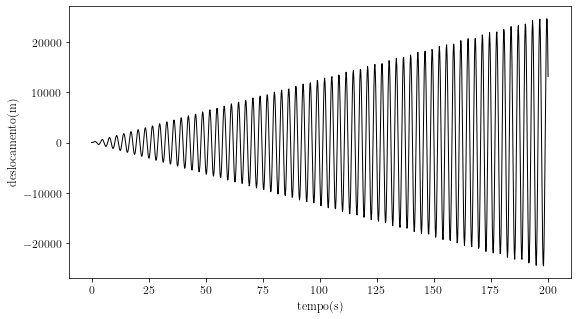

In [5]:
plt.figure(3,figsize = (9,5))
plt.plot(t,u,'k')
plt.xlabel('tempo(s)') ; plt.ylabel('deslocamento(m)')
plt.grid(False)

## Exemplo 1:
Para qual valor de m o sistema da figura abaixo entrará em ressonância? 

dado: $f(t) = 200sen50t$

<img src="ex1.png" alt="drawing" width="300"  />


## Exemplo 2:

Uma bomba alternativa de massa 70kg está montada no meio de uma placa de aço de módulo de elasticidade igual a $E = 2,068X10^{11} N/m^2$, com espessura igual a 0,0127 m, largura igual a 0,508 m e comprimento igual a2,54 m. Durante a operação da bomba, a placa está sujeita a uma força harmônica $F(t) = 220cos62,8t N$. Encontrar a amplitude de vibração da placa.  

<img src="ex2.png" alt="drawing" width="400"  />
